In [4]:
import iris
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np

In [46]:
#!wget 'https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/air.2023.nc'
!wget 'https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/uwnd.2023.nc'

--2023-05-19 18:40:01--  https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/uwnd.2023.nc
Resolviendo downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Conectando con downloads.psl.noaa.gov (downloads.psl.noaa.gov)[140.172.38.86]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 186739859 (178M) [application/x-netcdf]
Guardando como: “uwnd.2023.nc”

uwnd.2023.nc        100%[===================>] 178,09M  10,4MB/s    en 19s     

2023-05-19 18:40:20 (9,47 MB/s) - “uwnd.2023.nc” guardado [186739859/186739859]



In [47]:
cube = iris.load_cube('uwnd.2023.nc')
cube

<iris 'Cube' of eastward_wind / (m/s) (time: 480; Level: 17; latitude: 73; longitude: 144)>

In [48]:
lats = cube.coord('latitude').points
lons = cube.coord('longitude').points
print('latitudes: ', lats)
print('longitudes: ', lons)

latitudes:  [ 90.   87.5  85.   82.5  80.   77.5  75.   72.5  70.   67.5  65.   62.5
  60.   57.5  55.   52.5  50.   47.5  45.   42.5  40.   37.5  35.   32.5
  30.   27.5  25.   22.5  20.   17.5  15.   12.5  10.    7.5   5.    2.5
   0.   -2.5  -5.   -7.5 -10.  -12.5 -15.  -17.5 -20.  -22.5 -25.  -27.5
 -30.  -32.5 -35.  -37.5 -40.  -42.5 -45.  -47.5 -50.  -52.5 -55.  -57.5
 -60.  -62.5 -65.  -67.5 -70.  -72.5 -75.  -77.5 -80.  -82.5 -85.  -87.5
 -90. ]
longitudes:  [  0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5
  60.   62.5  65.   67.5  70.   72.5  75.   77.5  80.   82.5  85.   87.5
  90.   92.5  95.   97.5 100.  102.5 105.  107.5 110.  112.5 115.  117.5
 120.  122.5 125.  127.5 130.  132.5 135.  137.5 140.  142.5 145.  147.5
 150.  152.5 155.  157.5 160.  162.5 165.  167.5 170.  172.5 175.  177.5
 180.  182.5 185.  187.5 190.  192.5 195.  197.5 200.  202.5 205.  207.5
 210.  212.5 215. 

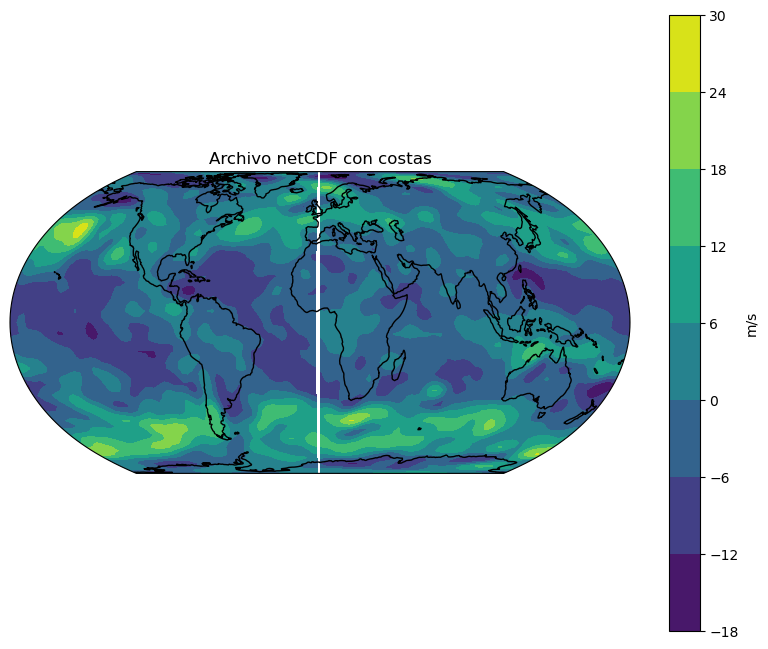

In [49]:
# Configura el mapa y la proyección
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.EqualEarth())
# Agrega características del mapa
ax.add_feature(cfeature.COASTLINE)
# Grafica los datos
plt.contourf(lons, lats, cube[0,0].data,
             transform=ccrs.PlateCarree(), cmap='viridis')
# Ajusta los límites del mapa
#ax.set_extent([-75.3, -74.6, 10.8, 11.1], crs=ccrs.PlateCarree())

# Muestra el gráfico
plt.colorbar(label=cube.units)
plt.title('Archivo netCDF con costas')
plt.show()

In [50]:
time_constraint = iris.Constraint(time=lambda cell: cell.point.hour == 0, Level = lambda cell: cell == 925)

In [51]:
ext_data = cube.extract(time_constraint)
ext_data

<iris 'Cube' of eastward_wind / (m/s) (time: 120; latitude: 73; longitude: 144)>

In [52]:
sample_points = [('longitude',np.linspace(0,357.5,360)), ('latitude',np.linspace(90,-90,181))]

In [53]:
cube_interpolated = ext_data.interpolate(sample_points, iris.analysis.Nearest())
cube_interpolated

<iris 'Cube' of eastward_wind / (m/s) (time: 120; latitude: 181; longitude: 360)>

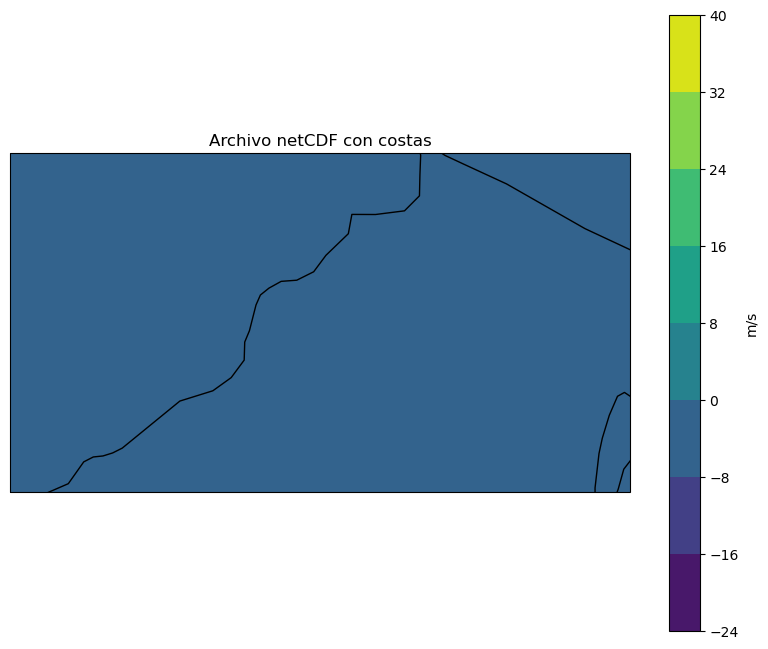

In [55]:
# Configura el mapa y la proyección
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.EqualEarth())
# Agrega características del mapa
ax.add_feature(cfeature.COASTLINE)
# Grafica los datos
plt.contourf(sample_points[0][1], sample_points[1][1], cube_interpolated[-1].data,
             transform=ccrs.PlateCarree(), cmap='viridis')
# Ajusta los límites del mapa
ax.set_extent([-75.3, -74.6, 10.8, 11.1], crs=ccrs.PlateCarree())

# Muestra el gráfico
plt.colorbar(label=cube.units)
plt.title('Archivo netCDF con costas')
plt.show()

In [43]:
cube_interpolated[0].data

masked_array(
  data=[[254.40000915527344, 254.40000915527344, 254.40000915527344, ...,
         254.40000915527344, 254.40000915527344, 254.40000915527344],
        [254.40000915527344, 254.40000915527344, 254.40000915527344, ...,
         254.40000915527344, 254.40000915527344, 254.40000915527344],
        [254.40000915527344, 254.40000915527344, 254.40000915527344, ...,
         254.40000915527344, 254.40000915527344, 254.40000915527344],
        ...,
        [264.70001220703125, 264.70001220703125, 264.70001220703125, ...,
         264.70001220703125, 264.70001220703125, 264.70001220703125],
        [264.70001220703125, 264.70001220703125, 264.70001220703125, ...,
         264.70001220703125, 264.70001220703125, 264.70001220703125],
        [264.70001220703125, 264.70001220703125, 264.70001220703125, ...,
         264.70001220703125, 264.70001220703125, 264.70001220703125]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, Fa